In [31]:
from freqml.download import *
from freqml import *
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
df = load_read("ETH", days="1")

In [6]:
df = pd.read_json("/home/zoltan/github/freqml/user_data/data/binance/ETH_USDT-trades.json")

In [7]:
df.shape

(290504, 13)

In [22]:
df = df[:1000]

In [25]:
del df['takerOrMaker']
del df['fee']
del df['info']
del df['symbol']
del df['timestamp']
del df['type']
del df['order']

In [26]:
df = df.set_index('datetime')

In [27]:
df.columns

Index(['id', 'side', 'price', 'amount', 'cost'], dtype='object')

In [72]:
df['id'] = df['id'] - df['id'].min()

In [79]:
df.tail(20)

,id,side,price,amount,cost
datetime,,,,,
2020-03-30 00:59:06.264000+00:00,980,buy,125.64,16.15725,2029.996890
2020-03-30 00:59:06.272000+00:00,981,buy,125.64,3.46662,435.546137
2020-03-30 00:59:06.276000+00:00,982,buy,125.64,2.96918,373.047775
2020-03-30 00:59:06.708000+00:00,983,sell,125.66,0.39966,50.221276
2020-03-30 00:59:08.184000+00:00,984,buy,125.67,3.03000,380.780100
2020-03-30 00:59:10.957000+00:00,985,buy,125.67,5.42302,681.510923
2020-03-30 00:59:11.948000+00:00,986,buy,125.68,0.08886,11.167925
2020-03-30 00:59:14.186000+00:00,987,sell,125.64,0.27000,33.922800
2020-03-30 00:59:22.172000+00:00,988,buy,125.67,0.08907,11.193427


In [74]:
df.shape

(1000, 5)

In [162]:
df2 = pd.DataFrame()
df3 = pd.DataFrame()

In [163]:
df["price"].idxmin()

Timestamp('2020-03-30 00:55:46.225000+0000', tz='UTC')

In [167]:
grouped = df.groupby(np.floor(df["id"]/100))
df2["low"] = grouped["price"].min()
df2["high"] = grouped["price"].max()
df2["open"] = grouped.filter(lambda x: x.iloc[df['id'].idxmin()["price"]])  # .iloc[df['id'].idxmin()]["price"]
#df2["open"] = df["price"][df.groupby(np.floor(df["id"]/100))["id"].idxmin()==df]
#df2["close"] = df.groupby(np.floor(df["id"]/100))["price"].max()
#df3["open"] = df["price"].iloc[::100]
#df3["close"] = df["price"].iloc[99::100]
#df2 = pd.concat([df2, df3], ignore_index=True)

TypeError: 'Timestamp' object is not subscriptable

In [161]:
df2

,low,high,open
0,125.68,125.92,NaN
1,125.71,125.89,NaN
2,125.80,125.92,NaN
3,125.76,125.92,NaN
4,125.75,125.88,NaN
5,125.71,125.90,NaN
6,125.60,125.75,NaN
7,125.57,125.75,NaN
8,125.57,125.79,NaN
9,125.62,125.78,NaN


In [135]:
df2

,low,high,open
id,,,
0.0,125.68,125.92,2020-03-30 00:47:26.160000+00:00
1.0,125.71,125.89,2020-03-30 00:48:21.328000+00:00
2.0,125.80,125.92,2020-03-30 00:49:20.558000+00:00
3.0,125.76,125.92,2020-03-30 00:50:46.021000+00:00
4.0,125.75,125.88,2020-03-30 00:51:27.007000+00:00
5.0,125.71,125.90,2020-03-30 00:52:31.349000+00:00
6.0,125.60,125.75,2020-03-30 00:53:39.614000+00:00
7.0,125.57,125.75,2020-03-30 00:55:03.737000+00:00
8.0,125.57,125.79,2020-03-30 00:56:25.343000+00:00


In [110]:
df["price"].iloc[::100]

datetime
2020-03-30 00:47:26.160000+00:00    125.76
2020-03-30 00:48:21.328000+00:00    125.72
2020-03-30 00:49:20.558000+00:00    125.81
2020-03-30 00:50:46.021000+00:00    125.86
2020-03-30 00:51:27.007000+00:00    125.85
2020-03-30 00:52:31.349000+00:00    125.88
2020-03-30 00:53:39.614000+00:00    125.71
2020-03-30 00:55:03.737000+00:00    125.74
2020-03-30 00:56:25.343000+00:00    125.65
2020-03-30 00:57:28.738000+00:00    125.77
Name: price, dtype: float64

In [108]:
df2.shape

(10, 4)

In [113]:
df2.head(11)

,low,high,open,close
id,,,,
0.0,125.68,125.92,"(0.0, [125.76, 125.76, 125.76, 125.76, 125.76,...",NaN
1.0,125.71,125.89,"(1.0, [125.72, 125.72, 125.72, 125.73, 125.73,...",NaN
2.0,125.80,125.92,"(2.0, [125.81, 125.81, 125.8, 125.81, 125.82, ...",NaN
3.0,125.76,125.92,"(3.0, [125.86, 125.86, 125.83, 125.87, 125.84,...",NaN
4.0,125.75,125.88,"(4.0, [125.85, 125.85, 125.86, 125.85, 125.85,...",NaN
5.0,125.71,125.90,"(5.0, [125.88, 125.87, 125.88, 125.86, 125.86,...",NaN
6.0,125.60,125.75,"(6.0, [125.71, 125.69, 125.68, 125.71, 125.72,...",NaN
7.0,125.57,125.75,"(7.0, [125.74, 125.75, 125.75, 125.73, 125.72,...",NaN
8.0,125.57,125.79,"(8.0, [125.65, 125.65, 125.65, 125.64, 125.64,...",NaN


In [63]:
df2.mean()

id        1.186245e+08
price     1.257634e+02
amount    4.011745e+00
cost      5.045178e+02
dtype: float64

In [59]:
df2.head(20)

,price,amount,cost
id,,,
118624028,125.76,7.50000,943.200000
118624029,125.76,7.50000,943.200000
118624030,125.76,1.94260,244.301376
118624031,125.76,1.80740,227.298624
118624032,125.76,1.23922,155.844307
118624033,125.77,10.01078,1259.055801
118624034,125.77,6.48160,815.190832
118624035,125.80,17.26725,2172.220050
118624036,125.82,6.00000,754.920000


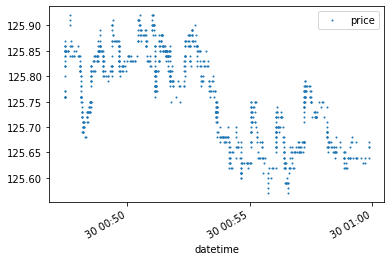

In [32]:
df.plot(y='price', style='o', ms=1)